## Matplotlib fundamentals

In [1]:
import pandas as pd

df = pd.read_csv('data/norway_new_car_sales_by_make.csv')
df.head()

,Year,Month,Make,Quantity,Pct
0,2007,1,Toyota,2884,22.7
1,2007,1,Volkswagen,2521,19.9
2,2007,1,Peugeot,1029,8.1
3,2007,1,Ford,870,6.9
4,2007,1,Volvo,693,5.5


In [2]:
df.shape

(4377, 5)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4377 entries, 0 to 4376
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Year      4377 non-null   int64  
 1   Month     4377 non-null   int64  
 2   Make      4367 non-null   object 
 3   Quantity  4377 non-null   int64  
 4   Pct       4377 non-null   float64
dtypes: float64(1), int64(3), object(1)
memory usage: 171.1+ KB


In [4]:
df.describe()

,Year,Month,Quantity,Pct
count,4377.000000,4377.000000,4377.000000,4377.000000
mean,2011.421065,6.459904,307.802148,2.762257
std,2.906408,3.446815,411.315021,3.635185
min,2007.000000,1.000000,1.000000,0.000000
25%,2009.000000,3.000000,14.000000,0.100000
50%,2011.000000,6.000000,153.000000,1.400000
75%,2014.000000,9.000000,461.000000,4.200000
max,2017.000000,12.000000,3017.000000,22.700000


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,4377.0,2011.421065,2.906408,2007.0,2009.0,2011.0,2014.0,2017.0
Month,4377.0,6.459904,3.446815,1.0,3.0,6.0,9.0,12.0
Quantity,4377.0,307.802148,411.315021,1.0,14.0,153.0,461.0,3017.0
Pct,4377.0,2.762257,3.635185,0.0,0.1,1.4,4.2,22.7


In [6]:
df.head(20)

,Year,Month,Make,Quantity,Pct
0,2007,1,Toyota,2884,22.7
1,2007,1,Volkswagen,2521,19.9
2,2007,1,Peugeot,1029,8.1
3,2007,1,Ford,870,6.9
4,2007,1,Volvo,693,5.5
5,2007,1,Skoda,665,5.2
6,2007,1,Opel,622,4.9
7,2007,1,Audi,599,4.7
8,2007,1,Honda,423,3.3
9,2007,1,Mercedes-Benz,362,2.9


In [15]:
import duckdb

df_quantity_brand = duckdb.query("""
    SELECT make AS Brand, SUM(quantity) AS Quantity
    FROM df
    GROUP BY Brand
    ORDER BY Quantity DESC
""").df()

df_quantity_brand



,Brand,Quantity
0,Volkswagen,206669.0
1,Toyota,168177.0
2,Volvo,99937.0
3,Ford,99713.0
4,BMW,73315.0
...,...,...
61,Secma,1.0
62,Westfield,1.0
63,McLaren,1.0
64,Tata,1.0


## Bar chart

<Axes: title={'center': 'Cars sold in Norway'}, xlabel='Brand'>

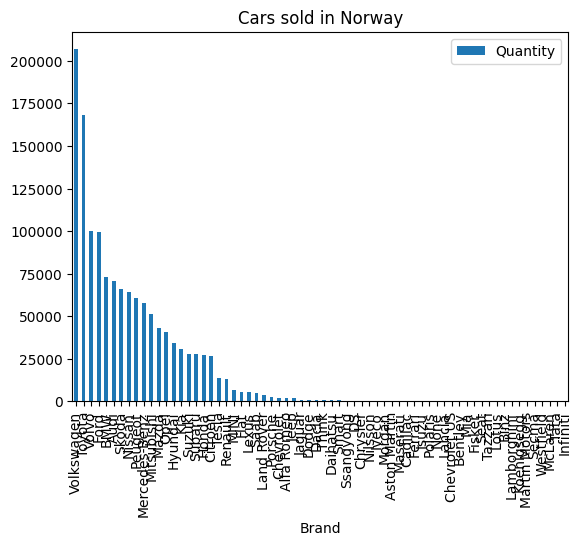

In [16]:
df_quantity_brand.plot(kind="bar", x="Brand", y="Quantity", title = "Cars sold in Norway")

<Axes: title={'center': 'Cars sold in Norway'}, xlabel='Brand'>

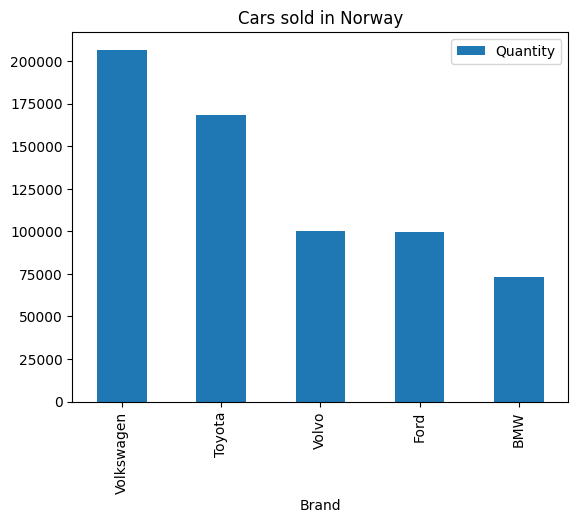

In [17]:
df_quantity_brand.head().plot(kind="bar", x="Brand", y="Quantity", title = "Cars sold in Norway")

<Axes: title={'center': 'Cars sold in Norway'}, xlabel='Brand'>

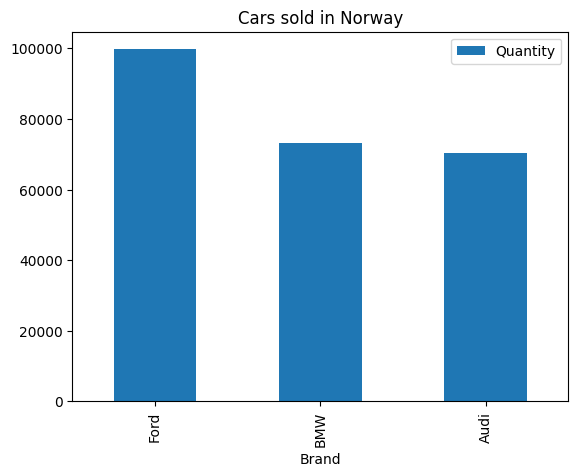

In [18]:
df_quantity_brand.iloc[3:6].plot(kind="bar", x="Brand", y="Quantity", title = "Cars sold in Norway")

## Matplotlib bar

<BarContainer object of 10 artists>

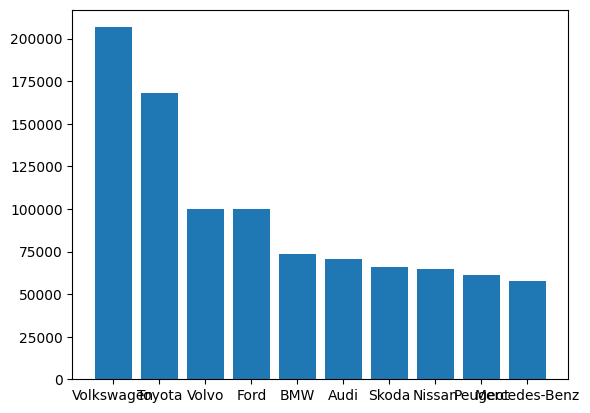

In [22]:
import matplotlib.pyplot as plt


df_quantity_brand_top10 = df_quantity_brand.iloc[:10]

fig, ax = plt.subplots()

ax.bar(
    x = df_quantity_brand_top10["Brand"],
    height = df_quantity_brand_top10["Quantity"]
)

# ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

<BarContainer object of 10 artists>

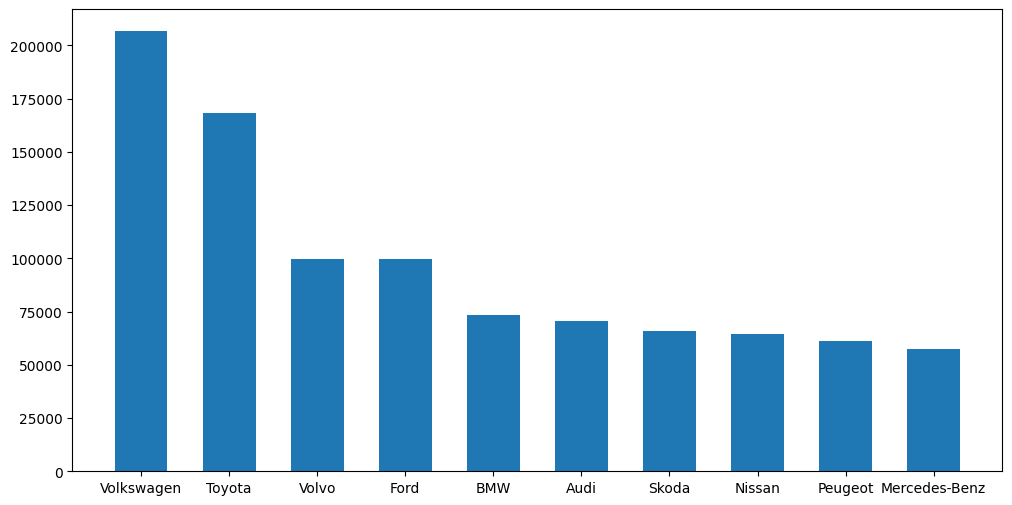

In [ ]:
fig, ax = plt.subplots(figsize = (12,6))

ax.bar(
    x = df_quantity_brand_top10["Brand"],
    height = df_quantity_brand_top10["Quantity"],
    width=0.6   # width of brand
)

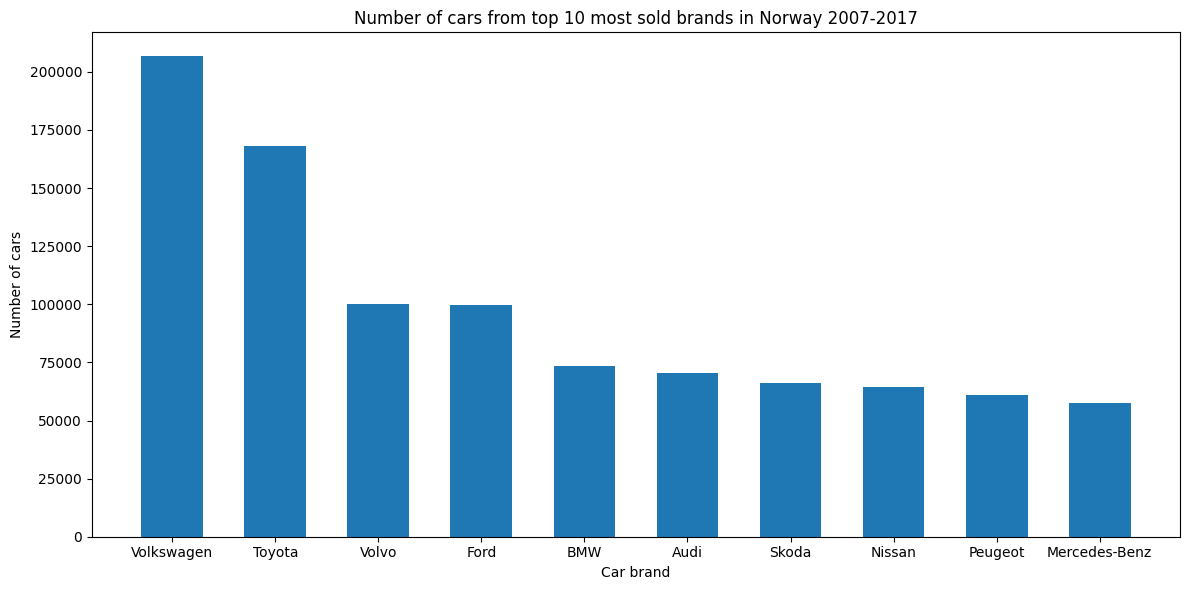

In [58]:
fig, ax = plt.subplots(figsize = (12,6))

ax.bar(
    x = df_quantity_brand_top10["Brand"],
    height = df_quantity_brand_top10["Quantity"],
    width=0.6   # width of brand
)

ax.set(
    title="Number of cars from top 10 most sold brands in Norway 2007-2017", 
    xlabel="Car brand", 
    ylabel="Number of cars"
)

fig.tight_layout()

fig.savefig("figures/bars_top_10_cars.png")

## Line chart

In [71]:
df_quantity_year = duckdb.query(
    """
    SELECT year, SUM(quantity) as Quantity
    FROM df
    GROUP BY year
    ORDER BY year
    """
).df()

df_quantity_year

,Year,Quantity
0,2007,129195.0
1,2008,110617.0
2,2009,98675.0
3,2010,127754.0
4,2011,138345.0
5,2012,137967.0
6,2013,142151.0
7,2014,144202.0
8,2015,150686.0
9,2016,154603.0


<Axes: >

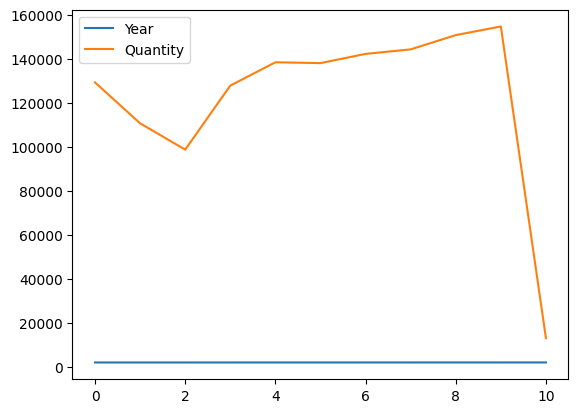

In [72]:
df_quantity_year.plot()

In [73]:
df_quantity_year = duckdb.query(
    """
    SELECT year, SUM(quantity) as Quantity
    FROM df
    GROUP BY year
    ORDER BY year
    """
).df().set_index('Year')

df_quantity_year

,Quantity
Year,
2007,129195.0
2008,110617.0
2009,98675.0
2010,127754.0
2011,138345.0
2012,137967.0
2013,142151.0
2014,144202.0
2015,150686.0


<Axes: xlabel='Year'>

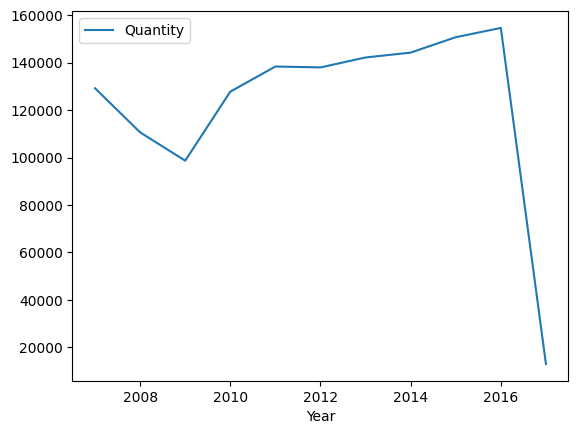

In [74]:
df_quantity_year.plot()

<Axes: xlabel='Year'>

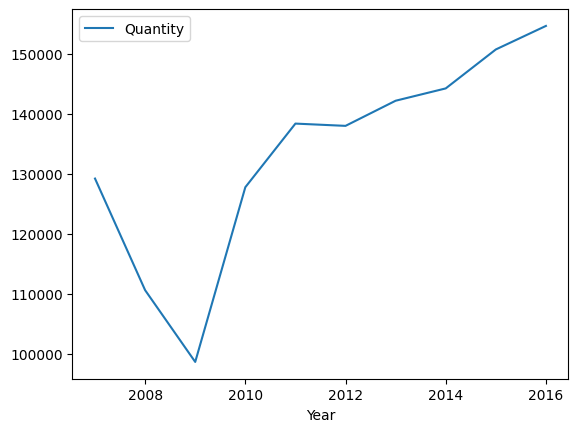

In [75]:
df_quantity_year.iloc[:-1].plot()

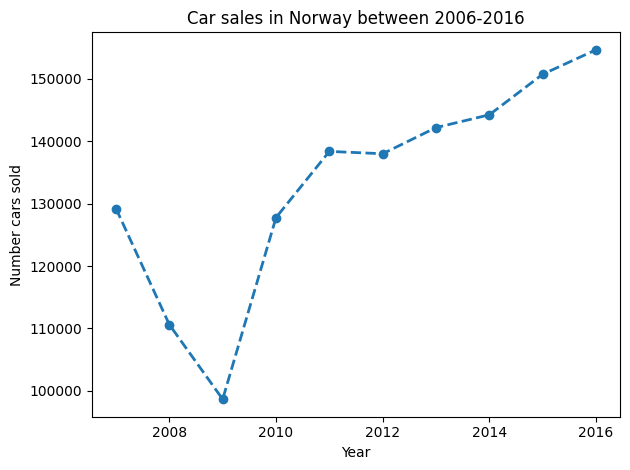

In [83]:
ax = df_quantity_year.iloc[:-1].plot(
    title="Car sales in Norway between 2006-2016",
    xlabel="Year",
    ylabel="Number cars sold",
    style="--o",
    linewidth=2,
    # legend=False - without legend
)

ax.legend().remove() # alt legend=False in ax = df.plot()
fig = ax.get_figure()
fig.tight_layout()
fig.savefig("figures/car_sales_yearly_line.png")